In [105]:
import yfinance as yf
import os
import pandas as pd

In [106]:
btc_ticker = yf.Ticker("BTC-USD")

In [107]:
btc = btc_ticker.history(period="max")

/Users/abhishek/Documents/Code/Python-DataScience-Projects/Bitcoin-Prediction/venv/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [108]:
btc # OHLC wrt to Daily chart / candle

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-27 00:00:00+00:00,41815.625000,42195.632812,41431.281250,42120.054688,11422941934,0.0,0.0
2024-01-28 00:00:00+00:00,42126.125000,42797.175781,41696.910156,42035.593750,16858971687,0.0,0.0
2024-01-29 00:00:00+00:00,42030.914062,43305.867188,41818.332031,43288.246094,20668476578,0.0,0.0


In [109]:
btc.index = btc.index.tz_localize(None) # Removing the time component for easier merge with wiki data
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-27,41815.625000,42195.632812,41431.281250,42120.054688,11422941934,0.0,0.0
2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,16858971687,0.0,0.0
2024-01-29,42030.914062,43305.867188,41818.332031,43288.246094,20668476578,0.0,0.0


In [110]:
del btc["Dividends"]
del btc["Stock Splits"]

In [111]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

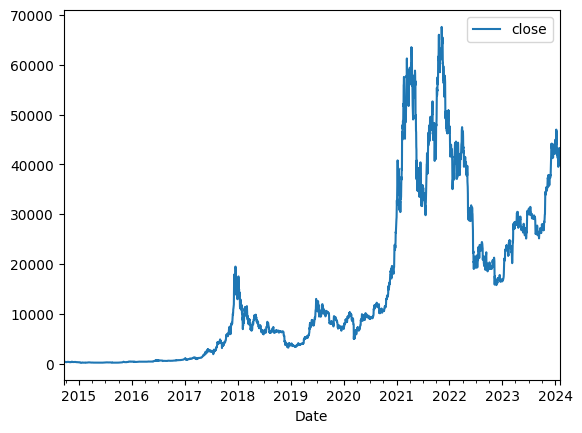

In [112]:

btc.plot.line(y="close", use_index=True)

Reading in Wikipedia Sentiment data

In [113]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-01-27,0.433333,0.015578,0.127778
2024-01-28,0.433333,0.015578,0.127778
2024-01-29,0.433333,0.015578,0.127778
2024-01-30,0.433333,0.015578,0.127778


Merging the two datasets together

In [114]:
btc = btc.merge(wiki, left_index=True, right_index=True) # merging both in terms of date

In [115]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-01-27,41815.625000,42195.632812,41431.281250,42120.054688,11422941934,0.433333,0.015578,0.127778
2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,16858971687,0.433333,0.015578,0.127778
2024-01-29,42030.914062,43305.867188,41818.332031,43288.246094,20668476578,0.433333,0.015578,0.127778
2024-01-30,43300.226562,43838.945312,42711.371094,42952.609375,23842814518,0.433333,0.015578,0.127778


In [116]:
btc["tomorrow"] = btc["close"].shift(-1)

In [117]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-01-27,41815.625000,42195.632812,41431.281250,42120.054688,11422941934,0.433333,0.015578,0.127778,42035.593750
2024-01-28,42126.125000,42797.175781,41696.910156,42035.593750,16858971687,0.433333,0.015578,0.127778,43288.246094
2024-01-29,42030.914062,43305.867188,41818.332031,43288.246094,20668476578,0.433333,0.015578,0.127778,42952.609375
2024-01-30,43300.226562,43838.945312,42711.371094,42952.609375,23842814518,0.433333,0.015578,0.127778,42414.882812


In [118]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int) # price goes up -> 1 , down -> 0

In [119]:
btc["target"].value_counts()

target
1    1810
0    1614
Name: count, dtype: int64

#### Creating baseline model

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:600]
test = btc[-600:]

In [122]:
predictor_columns = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictor_columns], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [123]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictor_columns])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.474025974025974

In [124]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [125]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [128]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictor_columns)

In [129]:
predictions["predictions"].value_counts()

predictions
1    1323
0    1006
Name: count, dtype: int64

In [130]:
precision_score(predictions["target"], predictions["predictions"])

0.5049130763416477

Adding Predictors to imporve accuracy

In [131]:
def compute_rolling(btc): 
    horizons = [2,7,60,365]  # find trend in these windows 
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [132]:

btc, new_predictors = compute_rolling(btc.copy())

In [133]:
predictions = backtest(btc, model, new_predictors)

In [134]:
precision_score(predictions["target"], predictions["predictions"])

0.5238095238095238

Well not the best lol, but this was more of an exercise for me. No judging github :))